
	There are 1257 present inside directory
	Pictures\DL_for_CV


	Random Sample Images



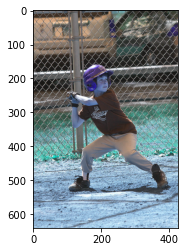

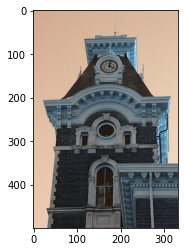

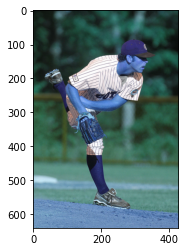

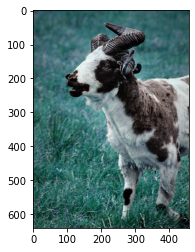

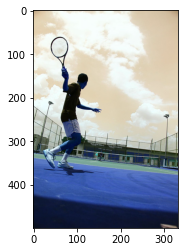


	Running Time in hh:mm:ss format is 0:0:2



'0:0:2'

In [1]:
import time
tic = time.time()

def Total_Running_Time(tic):
    toc = time.time()
    minutes, seconds = divmod(toc-tic, 60)
    hours, minutes = divmod(minutes, 60)
    tt = f"{int(hours)}:{int(minutes)}:{int(seconds)}"
    print(f"\n\tRunning Time in hh:mm:ss format is {tt}\n")
    return tt

import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import math
import random
from PIL import Image
import cv2

width = 224
height = 224
dsize = (width, height)

#Assuming Pictures are inside current directory /Pictures/DL_for_CV
#Change the directory appropriately

image_dir = "Pictures"
image_path = os.path.join(image_dir,'DL_for_CV')
if not os.path.isdir(image_path):
    print(F"\n\t{image_path}\n\tDirectory doesn't exists. Specify the valid directory. Stopping the execution.\n")
    sys.exit(1)

image_list = os.listdir(image_path)
total_images = len(image_list)

if total_images < 1:
    print(F"\n\tImages not found at {image_path}. Stopping the execution.\n")
    sys.exit(1)
else:
    print(F"\n\tThere are {total_images} present inside directory\n\t{image_path}\n")

random_index = []
for i in range(5):
    random_index.append(random.randint(0,total_images-1))

print(F"\n\tRandom Sample Images\n")    
for i in random_index:
    input_image = os.path.join(image_path,image_list[i])
    image = cv2.imread(input_image)
    plt.imshow(image)
    plt.show()




Total_Running_Time(tic)

In [2]:
tic = time.time()

def rotate_image(image, angle):
    """
    Rotates an OpenCV 2 / NumPy image about it's centre by the given angle
    (in degrees). The returned image will be large enough to hold the entire
    new image, with a black background
    """

    # Get the image size
    # No that's not an error - NumPy stores image matricies backwards
    image_size = (image.shape[1], image.shape[0])
    image_center = tuple(np.array(image_size) / 2)

    # Convert the OpenCV 3x2 rotation matrix to 3x3
    rot_mat = np.vstack(
        [cv2.getRotationMatrix2D(image_center, angle, 1.0), [0, 0, 1]]
    )

    rot_mat_notranslate = np.matrix(rot_mat[0:2, 0:2])

    # Shorthand for below calcs
    image_w2 = image_size[0] * 0.5
    image_h2 = image_size[1] * 0.5

    # Obtain the rotated coordinates of the image corners
    rotated_coords = [
        (np.array([-image_w2,  image_h2]) * rot_mat_notranslate).A[0],
        (np.array([ image_w2,  image_h2]) * rot_mat_notranslate).A[0],
        (np.array([-image_w2, -image_h2]) * rot_mat_notranslate).A[0],
        (np.array([ image_w2, -image_h2]) * rot_mat_notranslate).A[0]
    ]

    # Find the size of the new image
    x_coords = [pt[0] for pt in rotated_coords]
    x_pos = [x for x in x_coords if x > 0]
    x_neg = [x for x in x_coords if x < 0]

    y_coords = [pt[1] for pt in rotated_coords]
    y_pos = [y for y in y_coords if y > 0]
    y_neg = [y for y in y_coords if y < 0]

    right_bound = max(x_pos)
    left_bound = min(x_neg)
    top_bound = max(y_pos)
    bot_bound = min(y_neg)

    new_w = int(abs(right_bound - left_bound))
    new_h = int(abs(top_bound - bot_bound))

    # We require a translation matrix to keep the image centred
    trans_mat = np.matrix([
        [1, 0, int(new_w * 0.5 - image_w2)],
        [0, 1, int(new_h * 0.5 - image_h2)],
        [0, 0, 1]
    ])

    # Compute the tranform for the combined rotation and translation
    affine_mat = (np.matrix(trans_mat) * np.matrix(rot_mat))[0:2, :]

    # Apply the transform
    result = cv2.warpAffine(
        image,
        affine_mat,
        (new_w, new_h),
        flags=cv2.INTER_LINEAR
    )

    return result


def largest_rotated_rect(w, h, angle):
    """
    Given a rectangle of size wxh that has been rotated by 'angle' (in
    radians), computes the width and height of the largest possible
    axis-aligned rectangle within the rotated rectangle.

    Original JS code by 'Andri' and Magnus Hoff from Stack Overflow

    Converted to Python by Aaron Snoswell
    """

    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi

    bb_w = w * math.cos(alpha) + h * math.sin(alpha)
    bb_h = w * math.sin(alpha) + h * math.cos(alpha)

    gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)

    delta = math.pi - alpha - gamma

    length = h if (w < h) else w

    d = length * math.cos(alpha)
    a = d * math.sin(alpha) / math.sin(delta)

    y = a * math.cos(gamma)
    x = y * math.tan(gamma)

    return (
        bb_w - 2 * x,
        bb_h - 2 * y
    )


def crop_around_center(image, width, height):
    """
    Given a NumPy / OpenCV 2 image, crops it to the given width and height,
    around it's centre point
    """

    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

    if(width > image_size[0]):
        width = image_size[0]

    if(height > image_size[1]):
        height = image_size[1]

    x1 = int(image_center[0] - width * 0.5)
    x2 = int(image_center[0] + width * 0.5)
    y1 = int(image_center[1] - height * 0.5)
    y2 = int(image_center[1] + height * 0.5)

    return image[y1:y2, x1:x2]

width = 500
height = 500
dsize = (width, height)
def rotate_preserve_size(image, angle, dsize=dsize):
    image = cv2.imread(image)
    image_height, image_width = image.shape[0:2]
    image_orig = np.copy(image)
    image_rotated = rotate_image(image, angle)
    width, height = largest_rotated_rect(image_width, image_height, math.radians(angle))
    image_rotated_cropped = crop_around_center(image_rotated, width, height)
    final_image = Image.fromarray(image_rotated_cropped)
    #Using the PIL libaray converting the numpy array to comaptible image
    final_image = final_image.resize(size=dsize)
    return final_image

Total_Running_Time(tic)


	Running Time in hh:mm:ss format is 0:0:0



'0:0:0'


[109, 200, 70, 150, 1112]


	Original Image



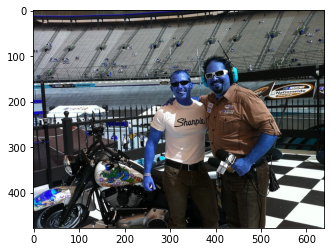


	Cropped Rotated Image with rotaion angle 25



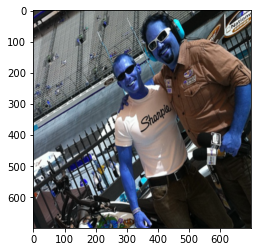


	Cropped Rotated Image with rotaion angle 45



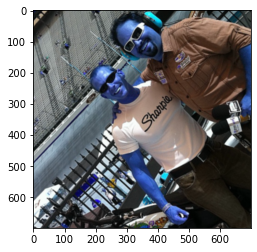


	Original Image



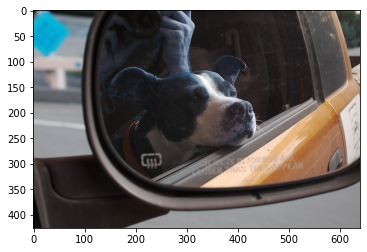


	Cropped Rotated Image with rotaion angle 25



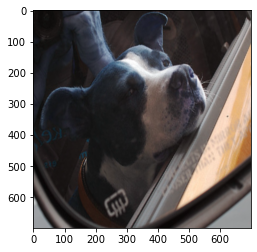


	Cropped Rotated Image with rotaion angle 45



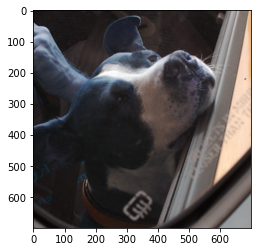


	Original Image



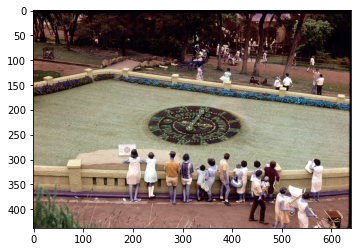


	Cropped Rotated Image with rotaion angle 25



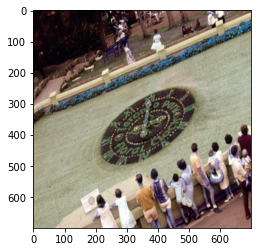


	Cropped Rotated Image with rotaion angle 45



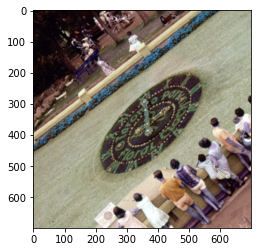


	Original Image



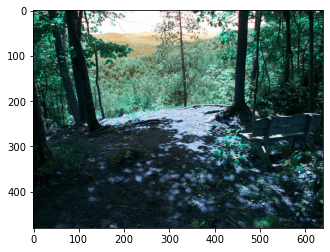


	Cropped Rotated Image with rotaion angle 25



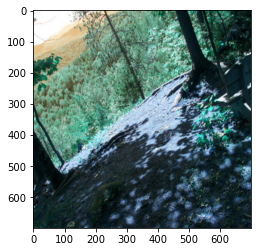


	Cropped Rotated Image with rotaion angle 45



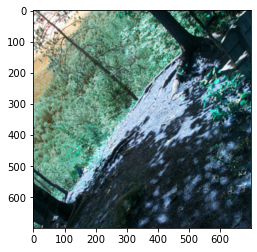


	Original Image



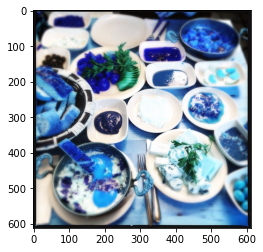


	Cropped Rotated Image with rotaion angle 25



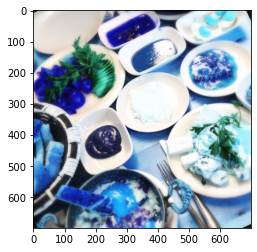


	Cropped Rotated Image with rotaion angle 45



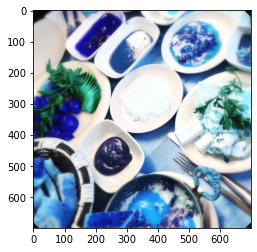


	Running Time in hh:mm:ss format is 0:0:3



'0:0:3'

In [6]:
tic = time.time()
random_index = []
for i in range(5):
    random_index.append(random.randint(0,total_images-1))
print(F"\n{random_index}\n")
width = 700
height = 700
dsize = (width, height)
for i in random_index:
    input_image = os.path.join(image_path,image_list[i])
    image = cv2.imread(input_image)
    print(F"\n\tOriginal Image\n")
    plt.imshow(image)
    plt.show()

    for angle in [25, 45]:#np.arange(15, 90, 15)np.arange(0, 360, 0.5):
        image_rotated_cropped = rotate_preserve_size(input_image, angle, dsize=dsize)
        print(F"\n\tCropped Rotated Image with rotaion angle {angle}\n")
        plt.imshow(image_rotated_cropped)
        plt.show()

Total_Running_Time(tic)